# Get some bathymetry data SRTM30

This is using [these data](https://topex.ucsd.edu/WWW_html/srtm30_plus.html) from the [Coastwatch ERDDAP server](http://coastwatch.pfeg.noaa.gov/erddap/).

This is a demo notebook to figure out how to do some plotting.

In [6]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

## Define the domain of interest

In [153]:
spatial_extent = [{'lat': 19.628873000, 'lon': -156.004160000},
  {'lat': 19.641079616, 'lon': -156.004160000},
  {'lat': 19.641079616, 'lon': -155.988668873},
  {'lat': 19.628873000, 'lon': -155.988668873},
  {'lat': 19.628873000, 'lon': -156.004160000}]
# icepx will want a bounding box with LL lon/lat, UR lon/lat
bb = [spatial_extent[0]['lon'], spatial_extent[0]['lat'], 
      spatial_extent[2]['lon'], spatial_extent[2]['lat']]

buf = 0.02
minlat = bb[1]-buf
maxlat = bb[3]+buf
minlon = bb[0]-buf
maxlon = bb[2]+buf
 
url = ('http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.csv?topo[(' \
                            +str(maxlat)+'):1:('+str(minlat)+')][('+str(minlon)+'):1:('+str(maxlon)+')]')


## Read in the datsa with pandas

In [154]:
df = pd.read_csv(url)
df = df.drop([0])
df['topo'] = pd.to_numeric(df['topo'], downcast='float')

Make into a geopandas dataframe. I don't think this is needed. I was going to try plotting with geopandas but 3D plotting didn't seem to be included.

In [142]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

In [14]:
gdf.head()

,latitude,longitude,topo,geometry
1,19.641666666666666,-156.0,4.0,POINT (-156.00000 19.64167)
2,19.641666666666666,-155.99166666666667,35.0,POINT (-155.99167 19.64167)
3,19.63333333333334,-156.0,-28.0,POINT (-156.00000 19.63333)
4,19.63333333333334,-155.99166666666667,18.0,POINT (-155.99167 19.63333)
5,19.625,-156.0,-41.0,POINT (-156.00000 19.62500)


## Set up the x, y, z for 3D plotting

In [155]:
zdata = gdf['topo']
xdata = gdf.geometry.x
ydata = gdf.geometry.y

Create the mesh grids. Surely there is a better way to do the Z part....

In [156]:
X, Y = np.meshgrid(np.unique(xdata), np.unique(ydata))
Z = np.zeros(X.shape)

for x, y, z in zip(xdata, ydata, zdata):
    Z[np.bitwise_and(y == Y, x == X)] = z

## Create plots

Version 1

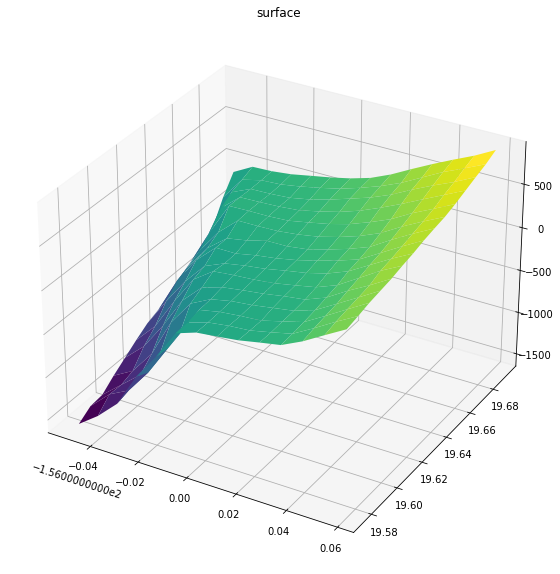

In [157]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Version 2

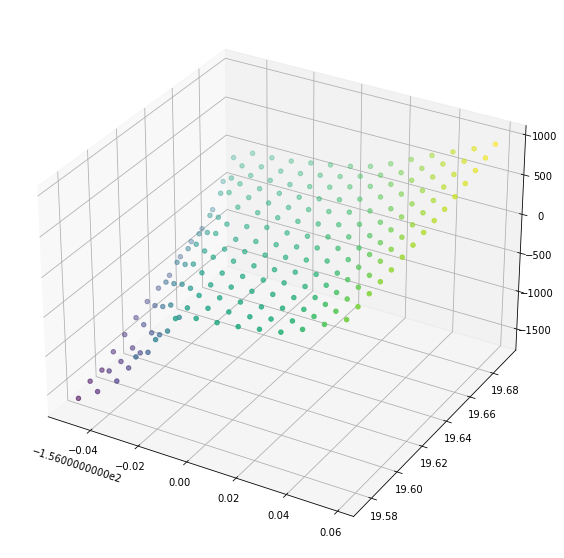

In [158]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(xdata, ydata, zdata, c=zdata);

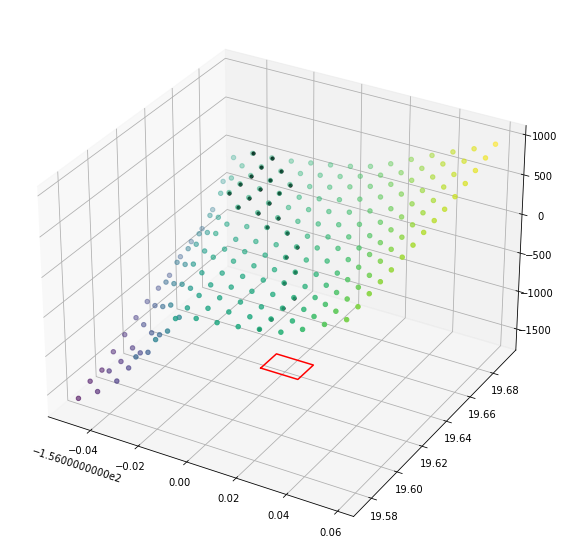

In [160]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
x = [bb[0], bb[0], bb[2], bb[2], bb[0]]
y = [bb[1], bb[3], bb[3], bb[1], bb[1]]
z = zdata.min()
ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.plot3D(x, y, z, c='red');
zlim = 25
x = xdata[(zdata > -1) & (zdata < zlim)]
y = ydata[(zdata > -1) & (zdata < zlim)]
z = zdata[(zdata > -1) & (zdata < zlim)]
ax.scatter3D(x, y, z, c='black', s=10, alpha=1, depthshade=False);

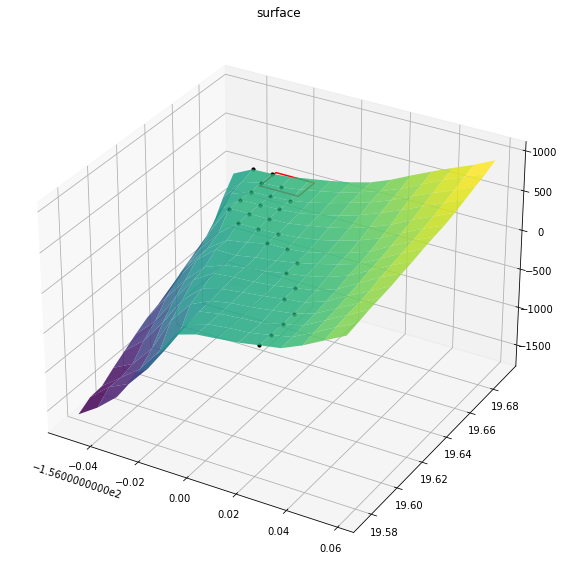

In [150]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',
               alpha=0.85)
ax.set_title('surface');
x = [bb[0], bb[0], bb[2], bb[2], bb[0]]
y = [bb[1], bb[3], bb[3], bb[1], bb[1]]
z = zdata.max()
ax.plot3D(x, y, z, c='red', alpha=1);
zlim = 25
x = xdata[(zdata > -1) & (zdata < zlim)]
y = ydata[(zdata > -1) & (zdata < zlim)]
z = zdata[(zdata > -1) & (zdata < zlim)]
ax.scatter3D(x, y, z, c='black', s=10, alpha=1, depthshade=False);

## Make the bathy plot with plotly

I don't know how to add data however.

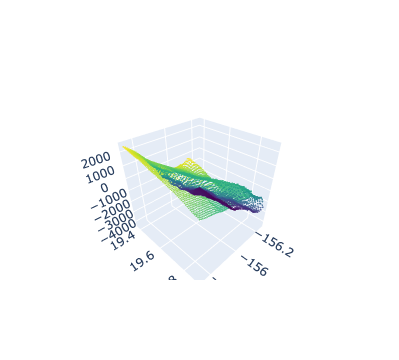

In [138]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=xdata,
    y=ydata,
    z=zdata,
    mode='markers',
    marker=dict(
        size=1,
        color=zdata,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

fig.show()